In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')


# EDA

In [103]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1989,9885-MFVSU,Female,0,Yes,Yes,35,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),46.35,1662.05,No
1305,4945-RVMTE,Female,0,No,No,28,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),59.55,1646.45,No
3685,7244-QWYHG,Male,0,Yes,No,50,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),44.45,2188.45,No
1694,0375-HVGXO,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,34.70,34.7,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [4]:
tenure_churn_yes=df[df["Churn"]=="Yes"].tenure
tenure_churn_no=df[df["Churn"]=="No"].tenure

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Group the tenures in bins of 12 months
labels = ["{0} - {1}".format(i,i+11) for i in range (1,72,12)]
df['tenure_group'] = pd.cut(df['tenure'], range(1,80,12), right=False, labels=labels)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


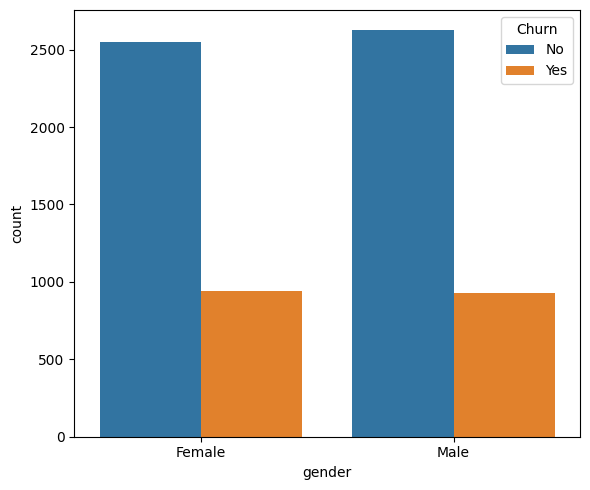

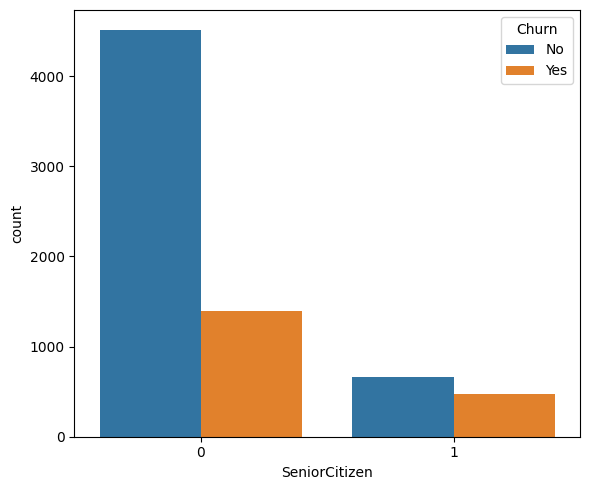

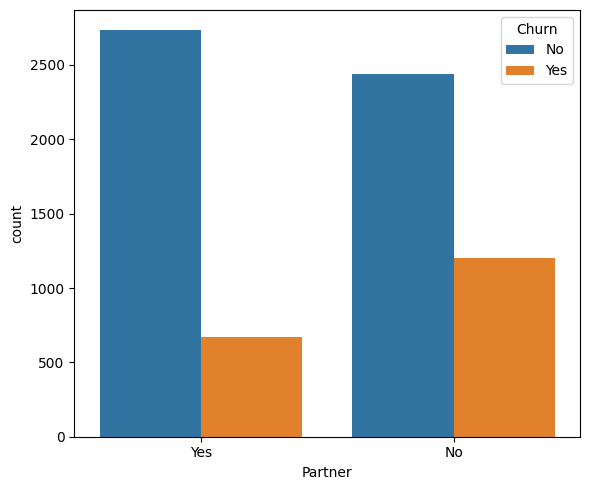

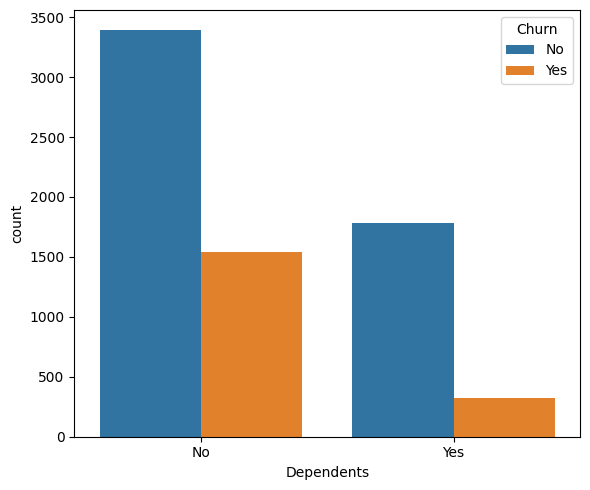

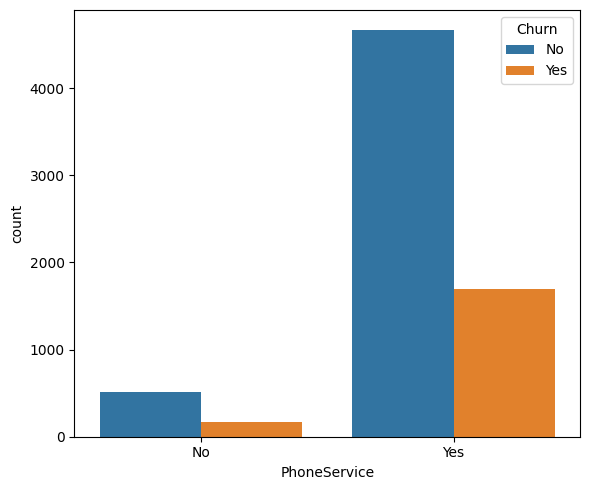

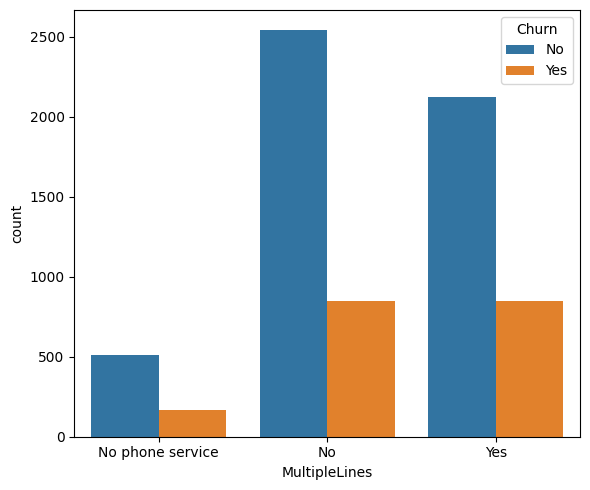

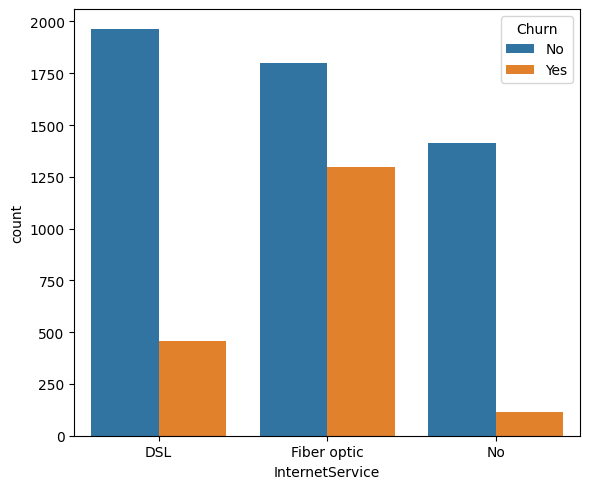

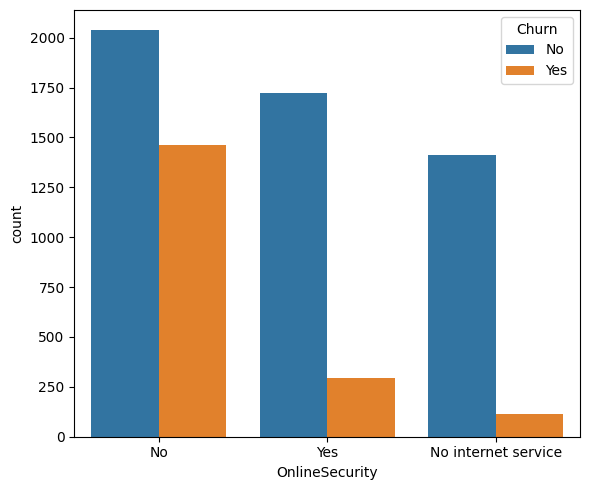

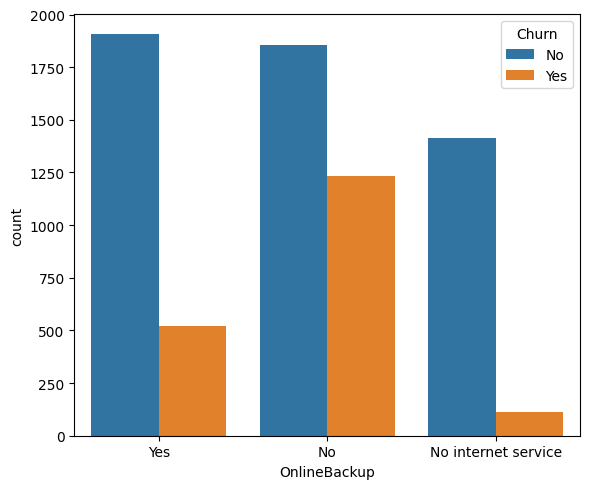

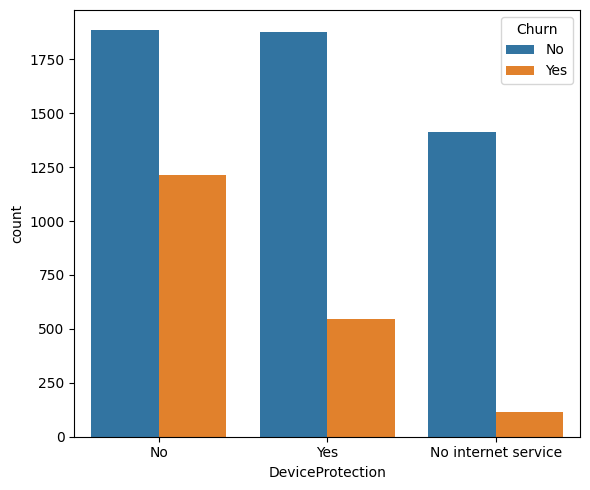

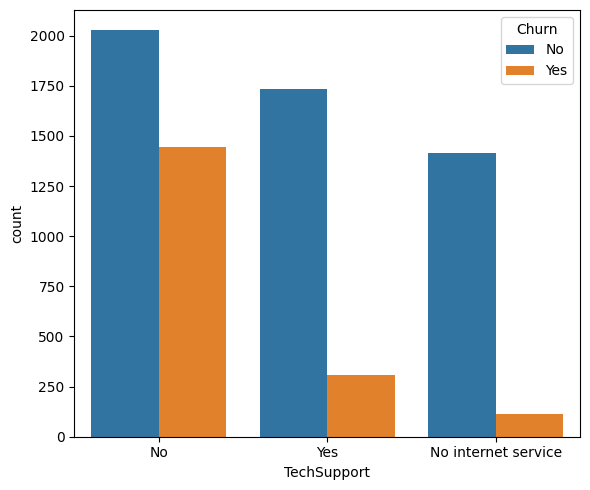

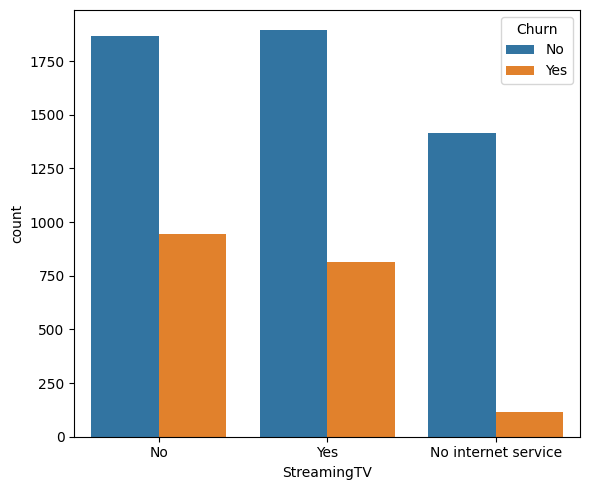

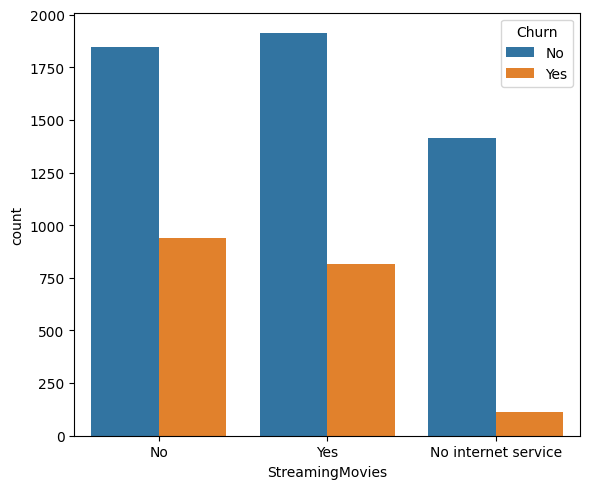

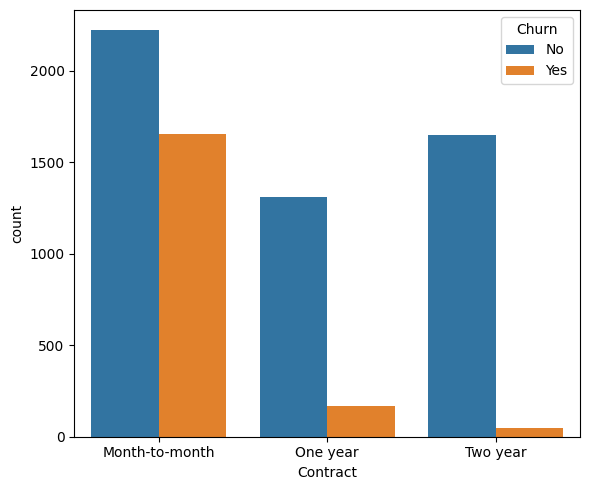

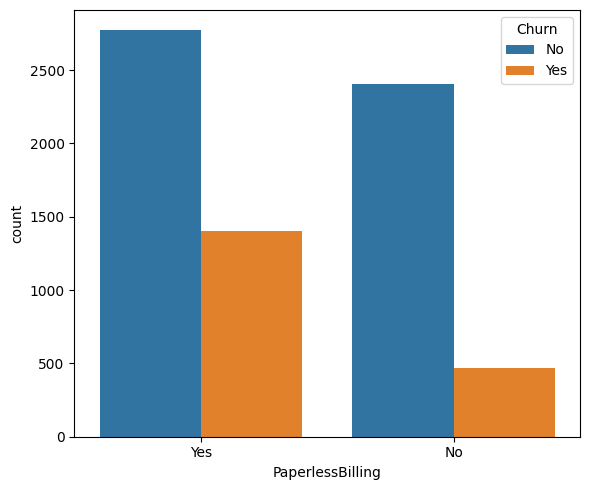

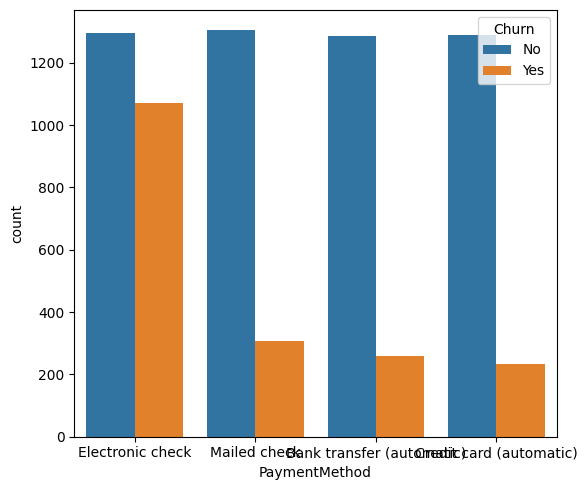

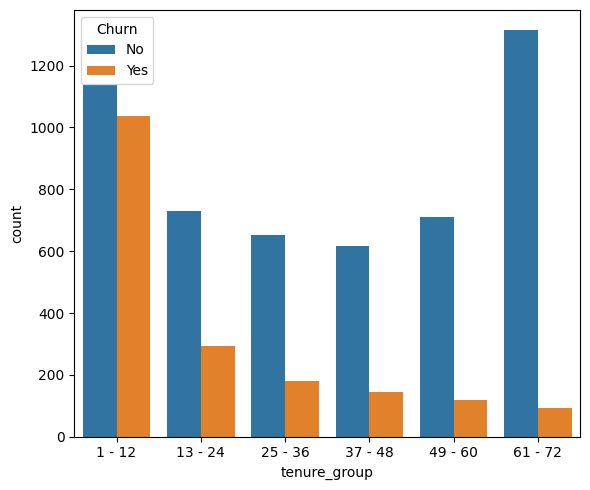

In [7]:
for i, predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges','customerID','tenure'])):
    plt.figure(i,figsize=(6,5))
    sns.countplot(data=df,x=predictor,hue='Churn')
    plt.tight_layout()

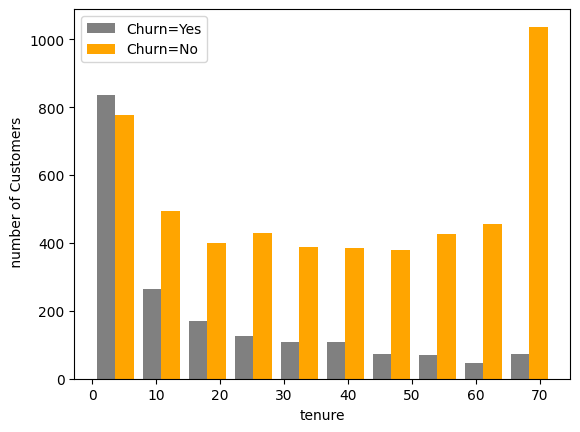

In [8]:
plt.xlabel('tenure')
plt.ylabel(' number of Customers')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['grey','orange'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [9]:
mc_churn_yes=df[df["Churn"]=="Yes"].MonthlyCharges
mc_churn_no=df[df["Churn"]=="No"].MonthlyCharges

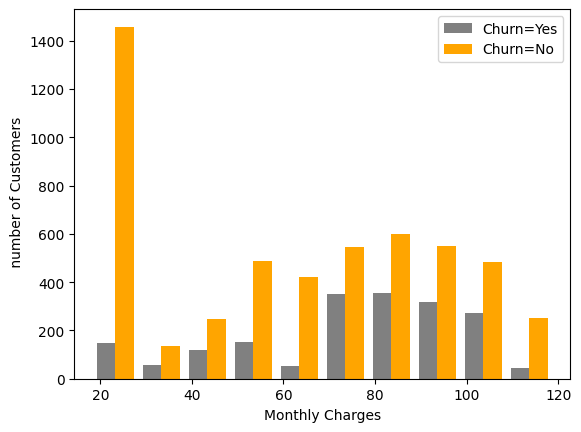

In [10]:
plt.xlabel('Monthly Charges')
plt.ylabel(' number of Customers')
plt.hist([mc_churn_yes,mc_churn_no],color=['grey','orange'],label=['Churn=Yes','Churn=No'])
plt.legend()

# Treat Categorical values

In [79]:
for column in df:
    print(f'{column}: {df[column].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844

In [5]:
df=df.replace('No phone service','No')
df=df.replace('No internet service','No')


In [6]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','gender']
for col in yes_no_col:
    df[col].replace({'Yes':0,'No':1},inplace=True)
    df[col].replace({'Female':0,'Male':1},inplace=True)

/tmp/ipykernel_33/4108355476.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes':0,'No':1},inplace=True)
/tmp/ipykernel_33/4108355476.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({'Yes':0,'No':1},inplace=True)
/tmp/ipykernel_33/4108355476.py:4: FutureWar

In [7]:
df=pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'])


In [8]:
df=df.replace({True:1,False:0})

/tmp/ipykernel_33/3566451038.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({True:1,False:0})


In [9]:
df=df[df.TotalCharges.notnull()]

In [10]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3877,2898-LSJGD,0,0,0,0,21,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0
3850,6418-HNFED,1,0,0,1,51,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
4062,1915-IOFGU,0,0,1,1,1,0,1,1,1,...,0,1,0,1,0,0,0,0,1,0
6660,1447-GIQMR,1,0,0,1,1,0,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [11]:
import tensorflow as tf
from tensorflow import keras

2024-02-09 16:28:55.135367: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 16:28:55.135551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 16:28:55.317483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
scaler=MinMaxScaler()
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2611,5976-JCJRH,1,0,0,1,0.126761,0,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2108,0842-IWYCP,0,0,1,1,0.633803,0,1,1,1,...,1,0,0,1,0,0,1,0,0,0
3216,7250-EQKIY,0,0,0,0,0.000000,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
2776,7503-QQRVF,1,1,0,1,0.211268,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0


In [11]:
df=df.drop(columns='customerID')

# Train and Test Data split

In [12]:
X=df.drop(columns='Churn')
y=df['Churn']

In [15]:
X.shape

(7032, 26)

In [64]:
len(X.columns)

26

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [66]:
len(X_train.columns)

26

In [67]:
X_train.shape

(5625, 26)

# Ann Model

In [17]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),

])
model.add(keras.layers.BatchNormalization())

model.compile(optimizer='adam',loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 6.3334 - accuracy: 0.3956
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 5.4600 - accuracy: 0.4418
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 5.2046 - accuracy: 0.4866
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 4.8680 - accuracy: 0.4898
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 5.0072 - accuracy: 0.4452
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 4.6337 - accuracy: 0.4679
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 4.1841 - accuracy: 0.5077
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 4.4892 - accuracy: 0.4800
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 3.8842 - accuracy: 0.5015
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 3.5839 - accura

# Test Results

In [18]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8017


[0.41947466135025024, 0.8017057776451111]

In [18]:
y_p=model.predict(X_test)

NameError: name 'model' is not defined

In [19]:
import pickle


# Specify the file path where you want to save the model
model_filepath = '/kaggle/working/my_model.pkl'

# Save the model to a file using pickle
with open(model_filepath, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filepath}")


Model saved to /kaggle/working/my_model.pkl


In [16]:
# %%capture
y_pred=[]
for e in y_p:
    if e>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

NameError: name 'y_p' is not defined

# Xgboost model

In [14]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=200,max_depth=3)
model_xgb.fit(X_train, y_train)
y_pred2 = model_xgb.predict(X_test)

# Confusion matrix / Classification Report

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
#cr=classification_report(y_test,y_pred)
#cm=confusion_matrix(y_test,y_pred)
cr2=classification_report(y_test,y_pred2)
cm2=confusion_matrix(y_test,y_pred2)

Text(50.722222222222214, 0.5, 'Truth')

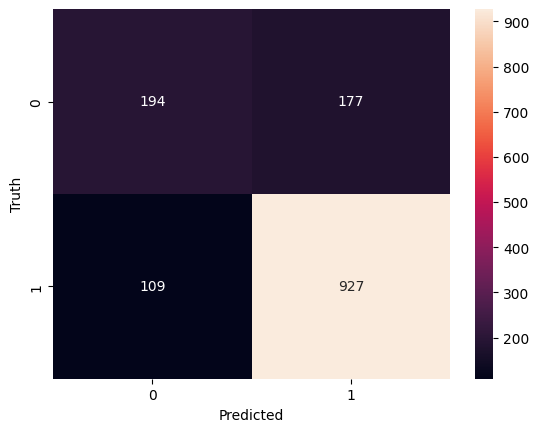

In [39]:
sns.heatmap(cm,fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [40]:
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.52      0.58       371
           1       0.84      0.89      0.87      1036

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Text(50.722222222222214, 0.5, 'Truth')

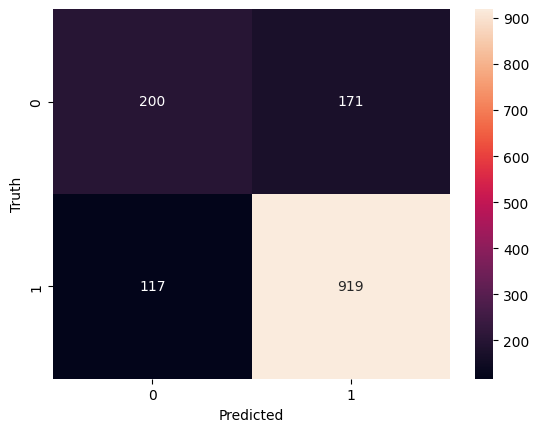

In [41]:
sns.heatmap(cm2,fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
print(cr2)

              precision    recall  f1-score   support

           0       0.62      0.50      0.55       378
           1       0.83      0.89      0.86      1029

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.77      0.78      0.78      1407



# Churn Probability and Risk Assessment columns


In [69]:
X_train['ChurnProbability'] = model.predict(X_train)

X_test['ChurnProbability'] = model.predict(X_test)


44/44 [==============================] - 0s 1ms/step


In [70]:
X_train['RiskAssessment'] = pd.cut(X_train['ChurnProbability'], bins=[-1, 0.2, 0.7,5], labels=['Low', 'Medium', 'High'])
X_test['RiskAssessment'] = pd.cut(X_test['ChurnProbability'], bins=[-1, 0.2, 0.7,5], labels=['Low', 'Medium', 'High'])


In [72]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ChurnProbability,RiskAssessment
5360,1,0,0,0,0.056338,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0.498934,Medium
6459,1,1,0,1,0.704225,1,1,1,0,1,...,0,1,0,0,0,1,0,0,0.803716,High
6187,1,0,0,0,0.098592,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0.940763,High
2405,0,0,0,0,0.098592,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0.332179,Medium
3529,1,1,0,1,0.014085,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0.388165,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5129,0,0,1,1,0.169014,0,1,1,1,1,...,0,1,0,0,0,0,0,1,0.524952,Medium
6428,0,0,1,1,0.070423,0,1,1,1,1,...,0,1,0,0,0,0,0,1,0.489631,Medium
5030,1,0,1,0,0.070423,0,1,1,1,0,...,0,1,0,0,0,0,0,1,0.479479,Medium
6747,0,0,0,1,0.718310,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0.922892,High


In [73]:
df3= pd.concat([X_train[['ChurnProbability','RiskAssessment']],X_test[['ChurnProbability','RiskAssessment']]], ignore_index=True)

In [128]:
df3=pd.merge(X_train[['ChurnProbability','RiskAssessment']],X_test[['ChurnProbability','RiskAssessment']],left_index=True, right_index=True)

In [108]:
df4=df

In [114]:
df4[['ChurnProbability','RiskAssessment']]=df3

In [128]:
df5

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnProbability,RiskAssessment
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.498934,Medium
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0.803716,High
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.940763,High
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.332179,Medium
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.388165,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,NaN,NaN
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,NaN,NaN
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,NaN,NaN
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,NaN,NaN


In [125]:
df5=df4[df4.notnull()]

In [131]:
df5=df5.dropna()

In [134]:
df5.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnProbability,RiskAssessment
6761,2369-FEVNO,Male,0,No,No,1,Yes,No,No,No,...,No,No,Month-to-month,Yes,Mailed check,19.90,19.90,No,0.735660,High
5097,8547-NSBBO,Male,0,No,No,35,Yes,Yes,Fiber optic,Yes,...,No,No,Month-to-month,Yes,Mailed check,96.75,3403.40,No,0.499656,Medium
4705,5760-FXFVO,Male,0,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,Month-to-month,Yes,Electronic check,78.95,494.95,No,0.449358,Medium
1472,9283-LZQOH,Male,0,Yes,Yes,13,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Credit card (automatic),74.40,896.75,Yes,0.630747,Medium


In [135]:
df5.to_excel('/kaggle/working/Customer_churn_pred.xlsx', index=False)


In [133]:
df5.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
ChurnProbability    0
RiskAssessment      0
dtype: int64